In [9]:
import numpy
import inference
from PIL import Image, ImageDraw
from io import BytesIO
import cv2
import requests
import supervision as sv
from PIL.ImageFile import ImageFile


In [4]:
model = inference.get_model("robot-detection-xru6m/5", api_key="WNJX84xQlZsMICKGFtRR")

In [5]:
model

In [40]:
image = Image.open("/Users/shravanprasanth/Documents/AIScouter/src/main/test.png")

# confidence and overlay here
results = model.infer(image, confidence=0.3)[0]

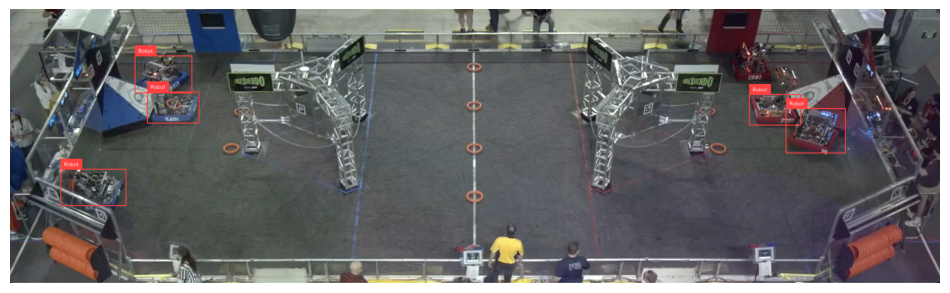

In [31]:
detections = sv.Detections.from_inference(results)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

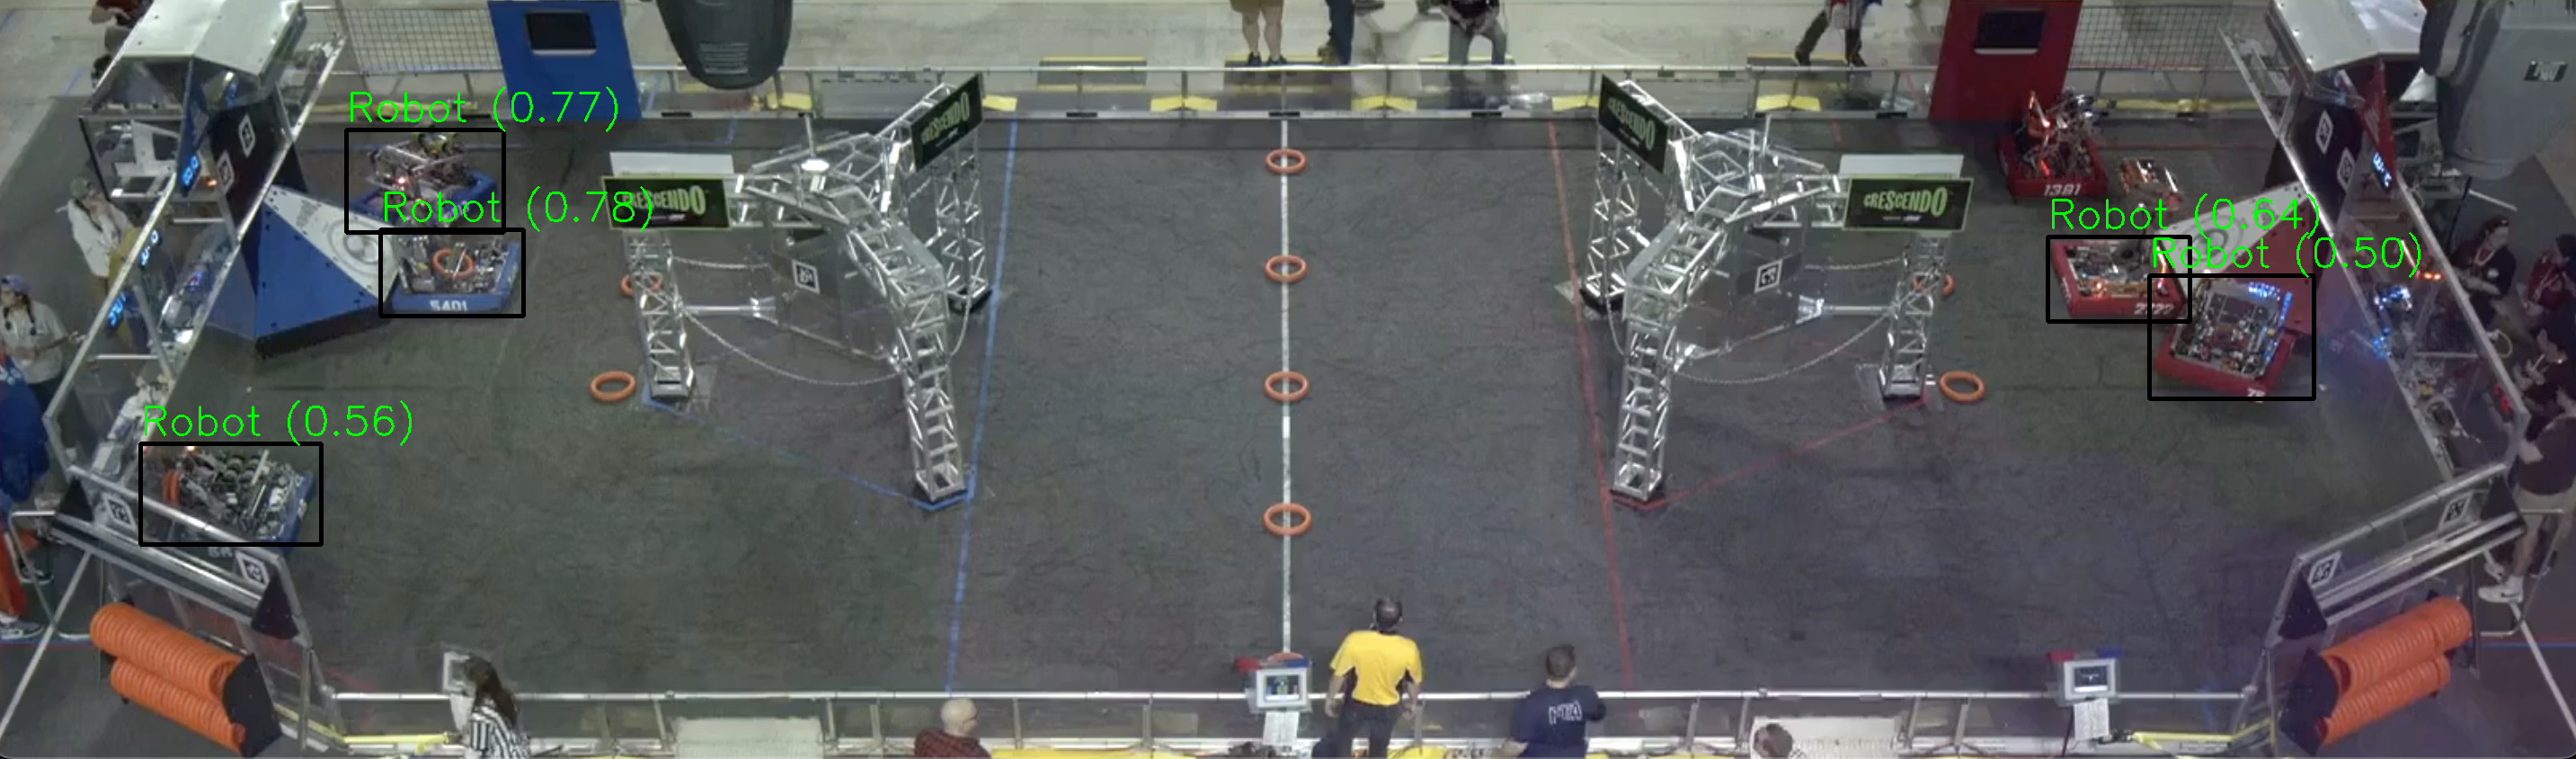

In [41]:
detections = sv.Detections.from_inference(results)
image_cv2 = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

bounding_box_annotator = sv.BoxAnnotator()
annotated_image = bounding_box_annotator.annotate(scene=image_cv2, detections=detections)

bboxes = detections.xyxy
confidences = detections.confidence
class_names = detections.data['class_name']

for bbox, confidence, class_name in zip(bboxes, confidences, class_names):
    bbox = bbox.astype(int)
    x0, y0, x1, y1 = bbox
    label = f"{class_name} ({confidence:.2f})"
    
    cv2.rectangle(annotated_image, (x0, y0), (x1, y1), color=(0, 0, 0), thickness=3)
    cv2.putText(annotated_image, label, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)

annotated_image_pil = Image.fromarray(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
annotated_image_pil